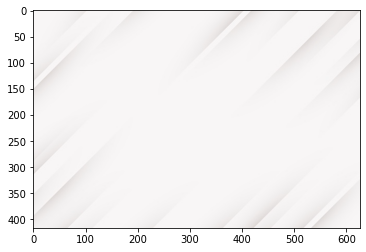

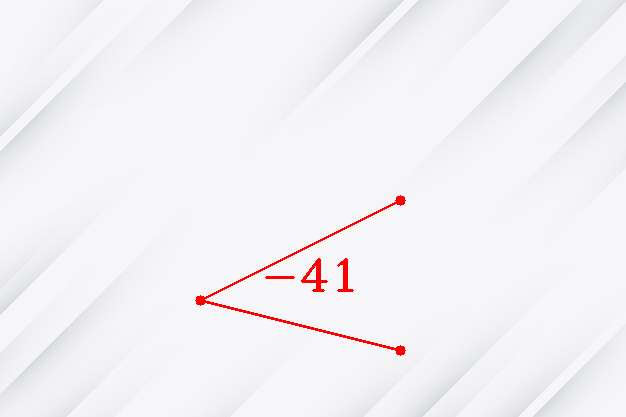

In [15]:
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#je vais tester sur une image vide blanc 
path = '/content/lb.jpg'
img = cv2.imread(path)
#afficher l'image pourqu'on peut chosir les cordonnées des points
plt.imshow(img)
plt.show()

pointsList = []
 
#fonction qui permet de retourner les cordonnées des 3 cliques du souris dans la liste "pointsList" et de tracer 2 lignes entre ces 3 points
#remarque : on clique sur le sommet puis les 2 autres
#def mousePoints(event,x,y,flags,params):
#    if event == cv2.EVENT_LBUTTONDOWN:
#        size = len(pointsList)
#        if size != 0 and size % 3 != 0:
#            cv2.line(img,tuple(pointsList[round((size-1)/3)*3]),(x,y),(0,0,255),2)
#        cv2.circle(img,(x,y),5,(0,0,255),cv2.FILLED)
#        pointsList.append([x,y])
 
#Puisque je travaille avec "Colab" je vais donner les cordonnées des points par moi méme 
#Remarque : les éléments de la liste "pointsList" sont sous la forme [x,y]

#entrer la sommet
pointsList.append([200,300])
#entrer les 2 autres points
pointsList.append([400,350])
pointsList.append([400,200])

#cette fonction a éliminer quand on active la fonction précédent
def draw(pointsList):
  size = len(pointsList)
  pt1 = pointsList[0]
  pt2 = pointsList[1]
  pt3 = pointsList[2]
  #tracer les deux lignes
  cv2.line(img,(pt1[0],pt1[1]),(pt2[0],pt2[1]),(0,0,255),2)
  cv2.line(img,(pt1[0],pt1[1]),(pt3[0],pt3[1]),(0,0,255),2)
  #tracer des petites cercles au niveau des points
  cv2.circle(img,(pt1[0],pt1[1]),5,(0,0,255),cv2.FILLED)
  cv2.circle(img,(pt2[0],pt2[1]),5,(0,0,255),cv2.FILLED)
  cv2.circle(img,(pt3[0],pt3[1]),5,(0,0,255),cv2.FILLED)


def gradient(pt1,pt2):
    return (pt2[1]-pt1[1])/(pt2[0]-pt1[0])
 
def getAngle(pointsList):
    pt1, pt2, pt3 = pointsList[-3:]
    m1 = gradient(pt1,pt2)
    m2 = gradient(pt1,pt3)
    angR = math.atan((m2-m1)/(1+(m2*m1)))
    angD = round(math.degrees(angR))
 
    cv2.putText(img,str(angD),(pt1[0]+60,pt1[1]-10),cv2.FONT_HERSHEY_COMPLEX,
                1.5,(0,0,255),2)
 
if len(pointsList) % 3 == 0 and len(pointsList) !=0:
  draw(pointsList)
  getAngle(pointsList)
  cv2_imshow(img)